# LetsGrowMore Data Analytics Internship
### Task-2

# Exploratory Data Analysis on Terrorism Dataset

### Importing Libraries

In [1]:
#import the warnings.
import warnings
warnings.filterwarnings("ignore")

In [2]:
#import the useful libraries.
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

### Read in the Data set.

In [3]:
#read the data set of "Terrorism" in inp0.
inp0= pd.read_csv("Terrorism.csv")

In [4]:
#Print the head of the data frame.
inp0.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [5]:
# Information about dataset
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(56), int64(21), object(58)
memory usage: 187.1+ MB


In [6]:
#pring the shape of dataframe inp0
inp0.shape

(181691, 135)

In [7]:
#print the information of variables to check their data types.
inp0.dtypes

eventid       float64
iyear           int64
imonth          int64
iday            int64
approxdate     object
               ...   
INT_LOG         int64
INT_IDEO        int64
INT_MISC        int64
INT_ANY         int64
related        object
Length: 135, dtype: object

In [8]:
inp0.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

## Dropping Unnecessary Columns

In [9]:
#drop the columns which are of no use and renaming Columns.
inp0.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','extended':'Extended','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City','latitude':'Latitude','longitude':'Longitude','attacktype1_txt':'AttackType','targtype1_txt':'TargetType','weaptype1_txt':'WeaponType','nkill':'Killed','nwound':'Wounded','summary':'Summary','target1':'Target'},inplace=True)

In [10]:
inp0=inp0[['Year','Month','Day','Extended','Country','Region','State','City','Latitude','Longitude','AttackType','TargetType','WeaponType','Killed','Wounded','Summary','Target']]

In [11]:
inp0.head()

,Year,Month,Day,Extended,Country,Region,State,City,Latitude,Longitude,AttackType,TargetType,WeaponType,Killed,Wounded,Summary,Target
0,1970,7,2,0,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,Assassination,Private Citizens & Property,Unknown,1.0,0.0,NaN,Julio Guzman
1,1970,0,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),Government (Diplomatic),Unknown,0.0,0.0,NaN,"Nadine Chaval, daughter"
2,1970,1,0,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,Assassination,Journalists & Media,Unknown,1.0,0.0,NaN,Employee
3,1970,1,0,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,Bombing/Explosion,Government (Diplomatic),Explosives,NaN,NaN,NaN,U.S. Embassy
4,1970,1,0,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,Government (Diplomatic),Incendiary,NaN,NaN,NaN,U.S. Consulate


In [12]:
inp0.tail()

,Year,Month,Day,Extended,Country,Region,State,City,Latitude,Longitude,AttackType,TargetType,WeaponType,Killed,Wounded,Summary,Target
181686,2017,12,31,0,Somalia,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,Armed Assault,Military,Firearms,1.0,2.0,12/31/2017: Assailants opened fire on a Somali...,Checkpoint
181687,2017,12,31,0,Syria,Middle East & North Africa,Lattakia,Jableh,35.407278,35.942679,Bombing/Explosion,Military,Explosives,2.0,7.0,12/31/2017: Assailants launched mortars at the...,Hmeymim Air Base
181688,2017,12,31,0,Philippines,Southeast Asia,Maguindanao,Kubentog,6.900742,124.437908,Facility/Infrastructure Attack,Private Citizens & Property,Incendiary,0.0,0.0,12/31/2017: Assailants set fire to houses in K...,Houses
181689,2017,12,31,0,India,South Asia,Manipur,Imphal,24.798346,93.940430,Bombing/Explosion,Government (General),Explosives,0.0,0.0,12/31/2017: Assailants threw a grenade at a Fo...,Office
181690,2017,12,31,0,Philippines,Southeast Asia,Maguindanao,Cotabato City,7.209594,124.241966,Bombing/Explosion,Unknown,Explosives,0.0,0.0,12/31/2017: An explosive device was discovered...,Unknown


In [13]:
inp0.describe()

,Year,Month,Day,Extended,Latitude,Longitude,Killed,Wounded
count,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,0.045346,23.498343,-4.586957e+02,2.403272,3.167668
std,13.259430,3.388303,8.814045,0.208063,18.569242,2.047790e+05,11.545741,35.949392
min,1970.000000,0.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,0.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,0.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,0.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,1.000000,74.633553,1.793667e+02,1570.000000,8191.000000


# Data Visualization

## Terrorists Activities per Year

In [15]:
#describe the Attack Type.
inp0.Year.describe()

count    181691.000000
mean       2002.638997
std          13.259430
min        1970.000000
25%        1991.000000
50%        2009.000000
75%        2014.000000
max        2017.000000
Name: Year, dtype: float64

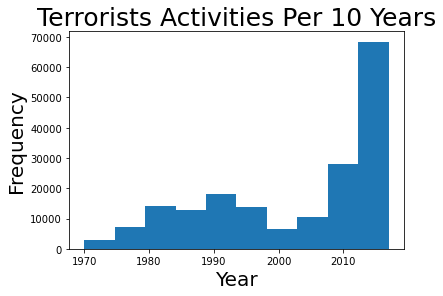

In [16]:
inp0.Year.plot.hist()
plt.title('Terrorists Activities Per 10 Years', fontsize=25)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.show()

Text(0.5, 1.0, 'No. of terrorist activities every year')

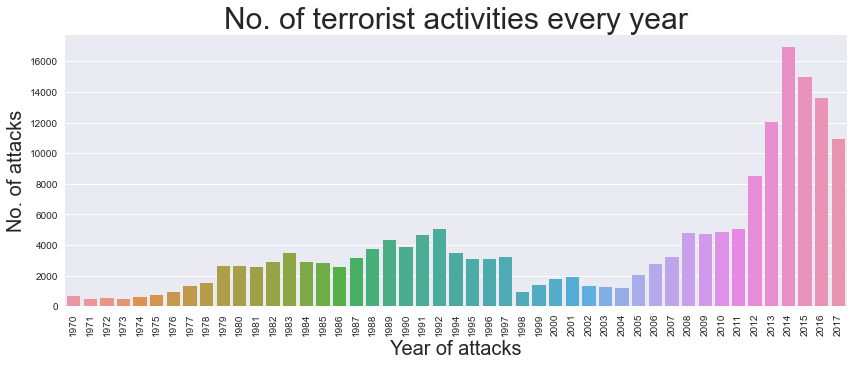

In [18]:
plt.style.use('seaborn')
plt.subplots(figsize=(14,5))
plt.xticks(rotation=90)
x_years=inp0['Year'].unique()
y_counts=inp0['Year'].value_counts(dropna=False).sort_index()
sns.barplot(x=x_years,y=y_counts)
plt.xlabel('Year of attacks',fontsize=20)
plt.ylabel('No. of attacks',fontsize=20)
plt.title('No. of terrorist activities every year',fontsize=30)

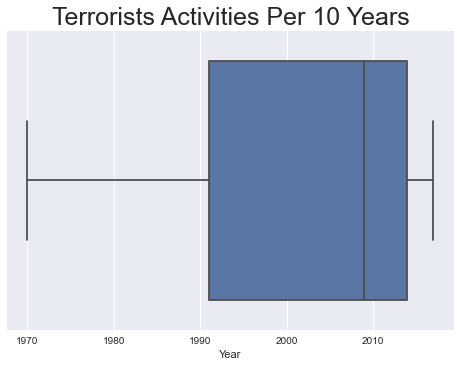

In [19]:
plt.title('Terrorists Activities Per 10 Years', fontsize=25)
sns.boxplot(x=inp0['Year'])
plt.show()

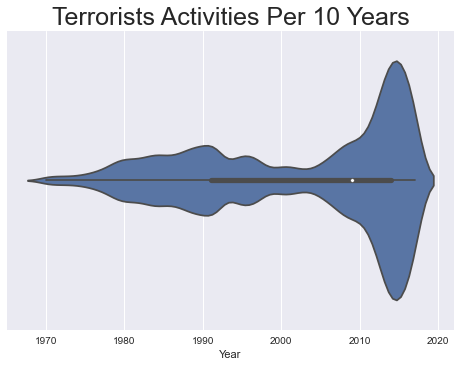

In [20]:
plt.title('Terrorists Activities Per 10 Years', fontsize=25)
sns.violinplot(x=inp0['Year'])
plt.show()

## Conclusion:

### Terror Activities have increased in last 2 Decades and Year 2014 experienced highest number of Terror Activities.

# Terrorists Activites on Different Countries

In [21]:
inp0.Country.describe()

count     181691
unique       205
top         Iraq
freq       24636
Name: Country, dtype: object

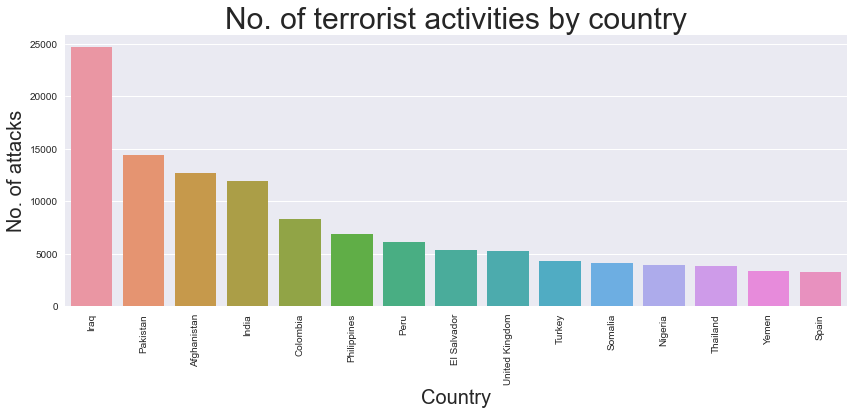

In [22]:
plt.style.use('seaborn')
plt.subplots(figsize=(14,5))
plt.xticks(rotation=90)
sns.barplot(x=inp0['Country'].value_counts()[:15].index,y=inp0['Country'].value_counts()[:15].values)
plt.xlabel('Country',fontsize=20)
plt.ylabel('No. of attacks',fontsize=20)
plt.title('No. of terrorist activities by country',fontsize=30)
plt.show()

## Conclusion: Iraq is the country with most terrorist attacks.

# Terrorists Activites on Different Region

In [24]:
inp0.Region.describe()

count                         181691
unique                            12
top       Middle East & North Africa
freq                           50474
Name: Region, dtype: object

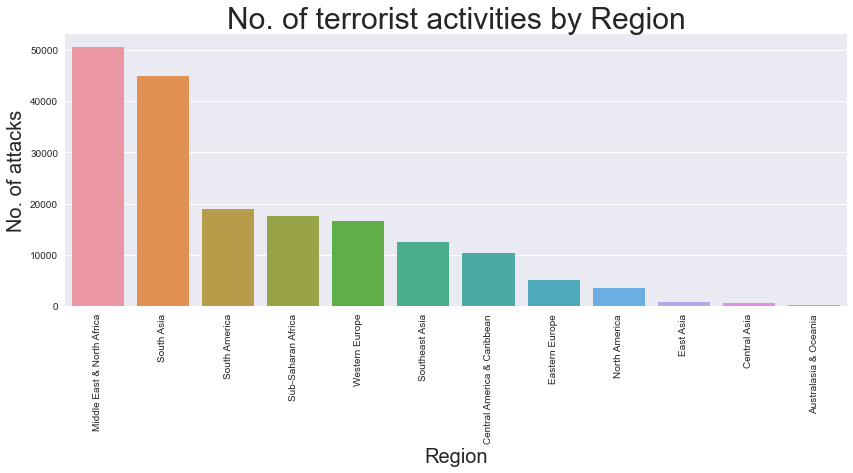

In [29]:
plt.style.use('seaborn')
plt.subplots(figsize=(14,5))
plt.xticks(rotation=90)
sns.barplot(x=inp0['Region'].value_counts()[:15].index,y=inp0['Region'].value_counts()[:15].values)
plt.xlabel('Region',fontsize=20)
plt.ylabel('No. of attacks',fontsize=20)
plt.title('No. of terrorist activities by Region',fontsize=30)
plt.show()

### Conclusion: Middle East & North Africa are the Regions with most terrorist attacks.

# Terrorists Activites on Different States.

In [49]:
inp0.State.describe()

count      181270
unique       2854
top       Baghdad
freq         7645
Name: State, dtype: object

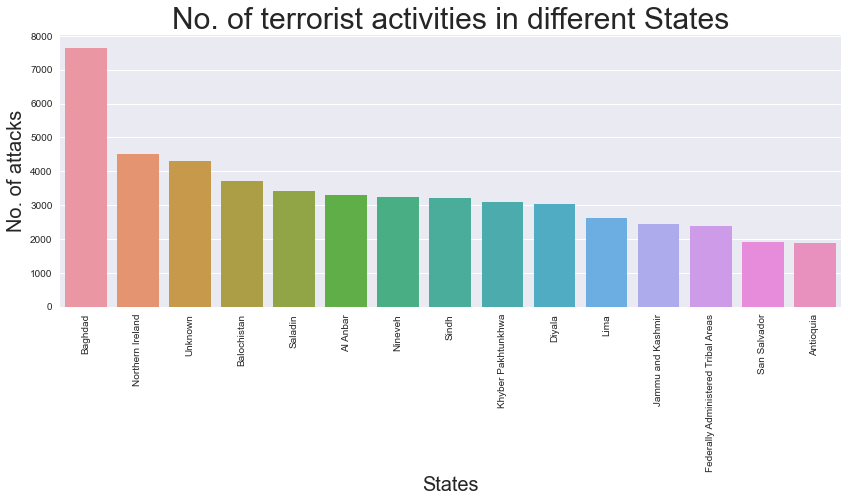

In [50]:
plt.style.use('seaborn')
plt.subplots(figsize=(14,5))
plt.xticks(rotation=90)
sns.barplot(x=inp0['State'].value_counts()[:15].index,y=inp0['State'].value_counts()[:15].values)
plt.xlabel('States',fontsize=20)
plt.ylabel('No. of attacks',fontsize=20)
plt.title('No. of terrorist activities in different States',fontsize=30)
plt.show()

### Conclusion: Baghdad of Iraq has incurred most terrorist attacks among all the States.

# Terrorists Activites on Different Cities.

In [51]:
inp0.City.describe()

count      181257
unique      36674
top       Unknown
freq         9775
Name: City, dtype: object

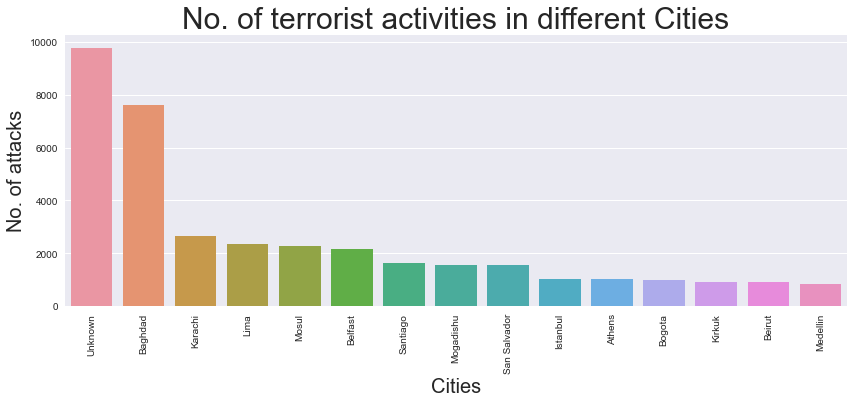

In [52]:
plt.style.use('seaborn')
plt.subplots(figsize=(14,5))
plt.xticks(rotation=90)
sns.barplot(x=inp0['City'].value_counts()[:15].index,y=inp0['City'].value_counts()[:15].values)
plt.xlabel('Cities',fontsize=20)
plt.ylabel('No. of attacks',fontsize=20)
plt.title('No. of terrorist activities in different Cities',fontsize=30)
plt.show()

### Conclusion: City with highest number of terrorist attacks still remains Unkown.

# Terrorists Activities with Different Attack Types.

In [30]:
inp0.AttackType.describe()

count                181691
unique                    9
top       Bombing/Explosion
freq                  88255
Name: AttackType, dtype: object

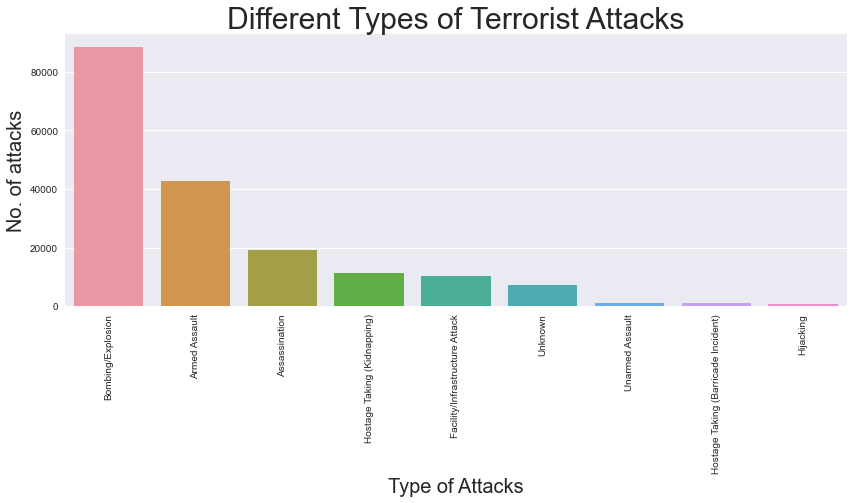

In [31]:
plt.style.use('seaborn')
plt.subplots(figsize=(14,5))
plt.xticks(rotation=90)
sns.barplot(x=inp0['AttackType'].value_counts().index,y=inp0['AttackType'].value_counts().values)
plt.xlabel('Type of Attacks',fontsize=20)
plt.ylabel('No. of attacks',fontsize=20)
plt.title('Different Types of Terrorist Attacks',fontsize=30)
plt.show()

### Conclusion: Bombing & Explosion were used the most for terror attacks.

# Terrorists Activities on Different Targets .

In [32]:
inp0.TargetType.describe()

count                          181691
unique                             22
top       Private Citizens & Property
freq                            43511
Name: TargetType, dtype: object

In [33]:
inp0.Target.describe()

count        181055
unique        86006
top       Civilians
freq           6461
Name: Target, dtype: object

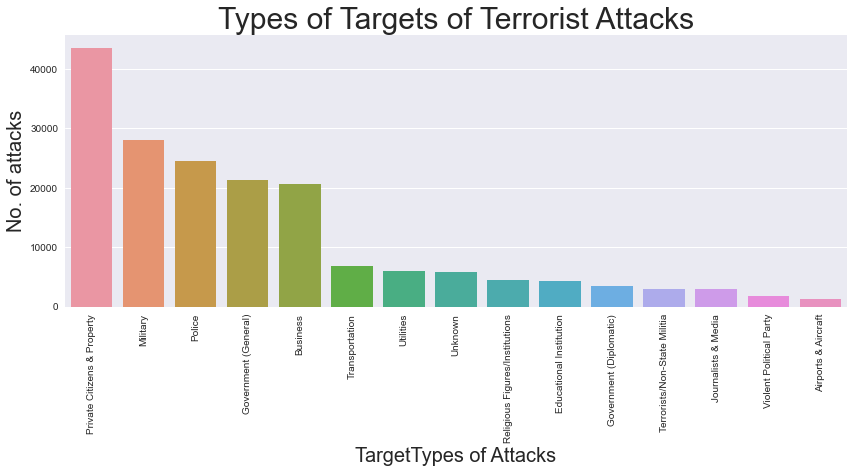

In [37]:
plt.style.use('seaborn')
plt.subplots(figsize=(14,5))
plt.xticks(rotation=90)
sns.barplot(x=inp0['TargetType'].value_counts()[:15].index,y=inp0['TargetType'].value_counts()[:15].values)
plt.xlabel('TargetTypes of Attacks',fontsize=20)
plt.ylabel('No. of attacks',fontsize=20)
plt.title('Types of Targets of Terrorist Attacks',fontsize=30)
plt.show()

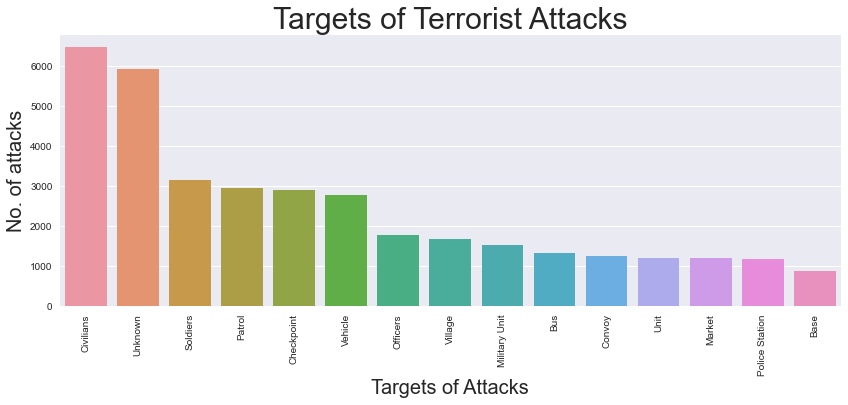

In [35]:
plt.style.use('seaborn')
plt.subplots(figsize=(14,5))
plt.xticks(rotation=90)
sns.barplot(x=inp0['Target'].value_counts()[:15].index,y=inp0['Target'].value_counts()[:15].values)
plt.xlabel('Targets of Attacks',fontsize=20)
plt.ylabel('No. of attacks',fontsize=20)
plt.title('Targets of Terrorist Attacks',fontsize=30)
plt.show()

### Conclusion: Civilians and their Properties were the Targets of Terrorists for most of the time.

# Terrorists Activities Using Different Weapons.

In [38]:
inp0.WeaponType.describe()

count         181691
unique            12
top       Explosives
freq           92426
Name: WeaponType, dtype: object

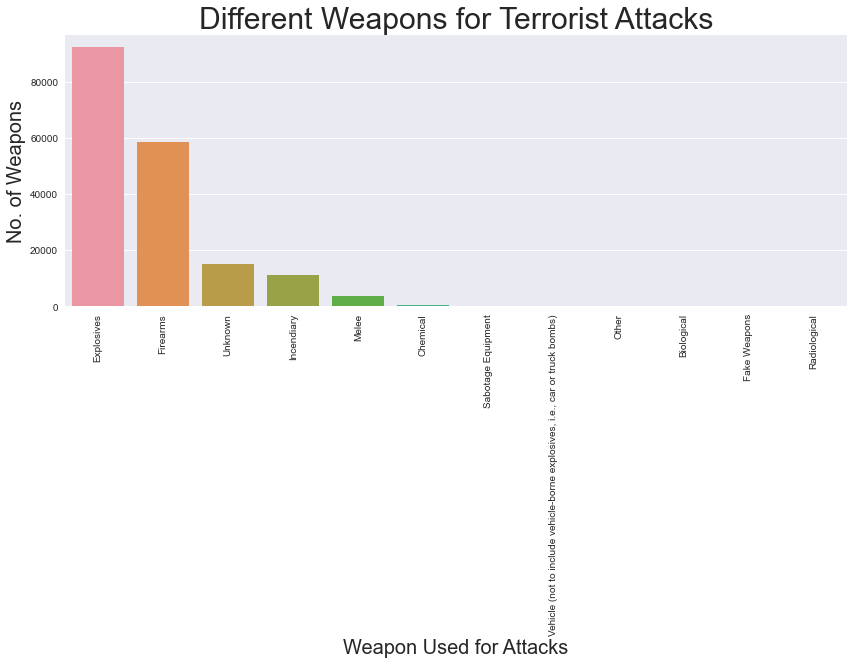

In [40]:
plt.style.use('seaborn')
plt.subplots(figsize=(14,5))
plt.xticks(rotation=90)
sns.barplot(x=inp0['WeaponType'].value_counts()[:15].index,y=inp0['WeaponType'].value_counts()[:15].values)
plt.xlabel('Weapon Used for Attacks',fontsize=20)
plt.ylabel('No. of Weapons',fontsize=20)
plt.title('Different Weapons for Terrorist Attacks',fontsize=30)
plt.show()

### Conclusion: This shows Terrorists most often use Explosives for their Activities.

# Number of People Killed every Year in Terrorists Attacks.

In [41]:
inp0.Killed.describe()

count    171378.000000
mean          2.403272
std          11.545741
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max        1570.000000
Name: Killed, dtype: float64

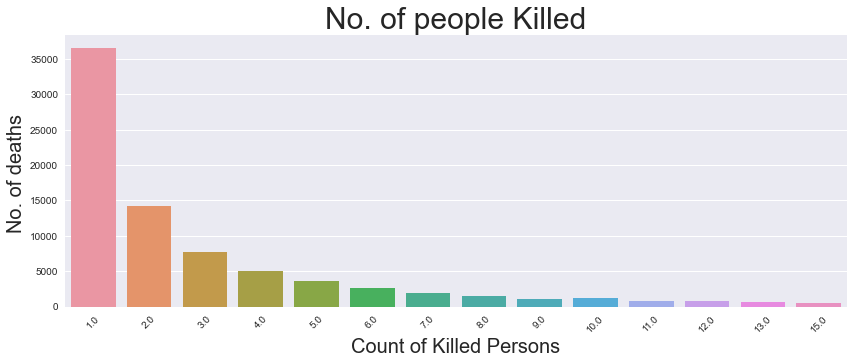

In [45]:
plt.style.use('seaborn')
plt.subplots(figsize=(14,5))
plt.xticks(rotation=45)
sns.barplot(x=inp0['Killed'].value_counts()[1:15].index,y=inp0['Killed'].value_counts()[1:15].values)
plt.xlabel('Count of Killed Persons',fontsize=20)
plt.ylabel('No. of deaths ',fontsize=20)
plt.title('No. of people Killed',fontsize=30)
plt.show()

# Number of people Injured every Year in Terrorists Attacks.

In [48]:
inp0.Wounded.describe()

count    165380.000000
mean          3.167668
std          35.949392
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max        8191.000000
Name: Wounded, dtype: float64

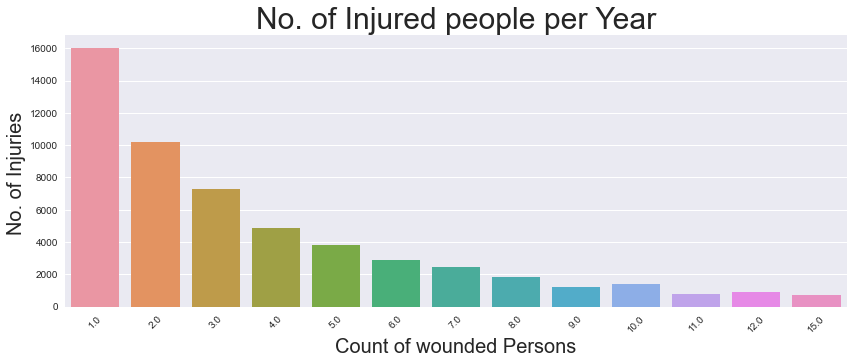

In [46]:
plt.style.use('seaborn')
plt.subplots(figsize=(14,5))
plt.xticks(rotation=45)
sns.barplot(x=inp0['Wounded'].value_counts()[1:15].index,y=inp0['Wounded'].value_counts()[1:15].values)
plt.xlabel('Count of wounded Persons',fontsize=20)
plt.ylabel('No. of Injuries ',fontsize=20)
plt.title('No. of Injured people per Year',fontsize=30)
plt.show()

# Results of Exploratory Data Analysis:
### --> Year with highest terrorist attacks: 2014.
### --> Country with highest terrorist attacks: Iraq.
### --> Region with highest terrorist attacks: Middle East & North Africa.
### --> State with highest terrorist attacks: Baghdad(Iraq).
### --> City with highest terrorist attacks: Unknown.
### --> Most type of the terrorist attacks: Bombing/Explosion.
### --> Major targets of terrorist attacks: Civilians and their Properties.
### --> Mostly used Weapons by terrorists: Explosives.

# Done by- Mansi Singh